In [7]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [8]:
# CUPED article
# https://exp-platform.com/Documents/2013-02-CUPED-ImprovingSensitivityOfControlledExperiments.pdf

In [9]:
N_SAMPLES = 800

In [10]:
np.random.seed(10)

df = pd.DataFrame({'x': np.random.uniform(-10, 10, N_SAMPLES) + 50})
df['y'] = df['x'] * 1.5 + np.random.uniform(-15, 15, N_SAMPLES)

df['binary'] = 0
df.loc[range(int(N_SAMPLES / 2)), 'binary'] = 1
df = df.sample(frac=1, random_state=10).reset_index(drop=True)

df['period'] = 'post'
df.loc[range(int(N_SAMPLES / 2)), 'period'] = 'pre'

df.loc[(df['binary'] == 1) & (df['period'] == 'post'), 'y'] = \
df.loc[(df['binary'] == 1) & (df['period'] == 'post'), 'y'] * 1.05  # add treatment effect

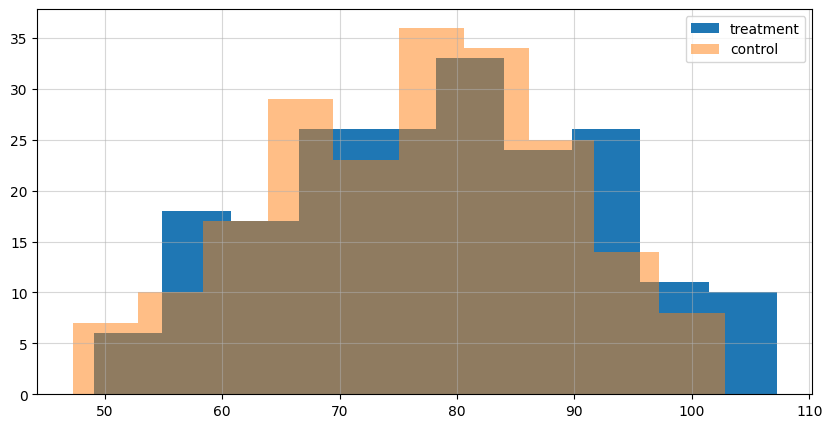

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(df[(df.binary == 1) & (df['period'] == 'post')]['y'], label='treatment')
plt.hist(df[(df.binary == 0) & (df['period'] == 'post')]['y'], alpha=0.5, label='control')
plt.legend()
plt.grid(alpha=0.5);

In [12]:
ttest_ind(df[(df.binary == 1) & (df['period'] == 'post')]['y'], 
          df[(df.binary == 0) & (df['period'] == 'post')]['y'])

Ttest_indResult(statistic=1.804095010207658, pvalue=0.07197233077656133)

In [13]:
thetha = np.cov(df[df['period'] == 'pre']['x'], 
                df[df['period'] == 'pre']['y'])[0, 1] / df['x'].var()
x_mean = df[df['period'] == 'pre']['x'].mean()

df['y_cuped'] = df['y'] - thetha * df['x'] + x_mean

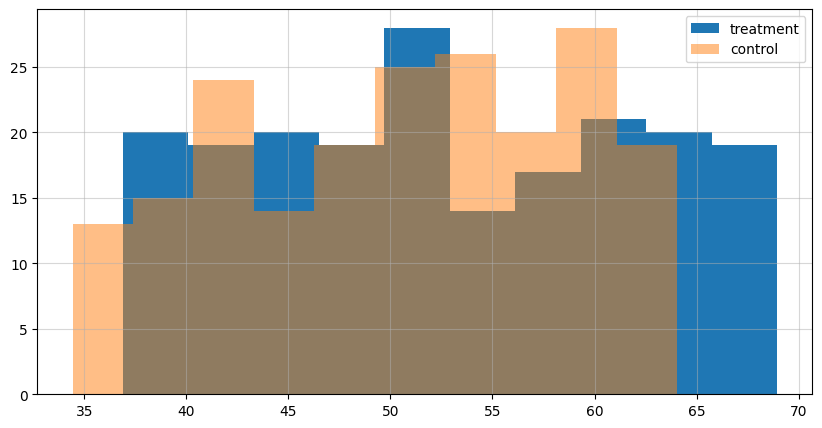

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(df[(df.binary == 1) & (df['period'] == 'post')]['y_cuped'], label='treatment')
plt.hist(df[(df.binary == 0) & (df['period'] == 'post')]['y_cuped'], alpha=0.5, label='control')
plt.legend()
plt.grid(alpha=0.5);

In [16]:
# WOW stat test come more sensitive
ttest_ind(df[(df.binary == 1) & (df['period'] == 'post')]['y_cuped'], 
          df[(df.binary == 0) & (df['period'] == 'post')]['y_cuped'])

Ttest_indResult(statistic=2.7367044146665718, pvalue=0.0064838801491492876)